# RESULT ANALYSIS (POLY 1st OUTPUT DIMENSION - 1e-3)

In [1]:
import matplotlib.pyplot as plt
import pickle
import math
import sys
sys.path.insert(0,'..')
from plot import plot_single_model  # function to plot convergence rate and logarithmic residual error of model (given fstar)

In [2]:
# load best 5 performing models
six = {}
seven = {}
fifteen = {}
sixteen = {}
seventeen = {}

with open("..\gs_models\gs_poly_1_6", "rb") as f:
    six = pickle.load(f)['model']
with open("..\gs_models\gs_poly_1_7", "rb") as f:
    seven = pickle.load(f)['model']
with open("..\gs_models\gs_poly_1_15", "rb") as f:
    fifteen = pickle.load(f)['model']
with open("..\gs_models\gs_poly_1_16", "rb") as f:
    sixteen = pickle.load(f)['model']
with open("..\gs_models\gs_poly_1_17", "rb") as f:
    seventeen = pickle.load(f)['model']

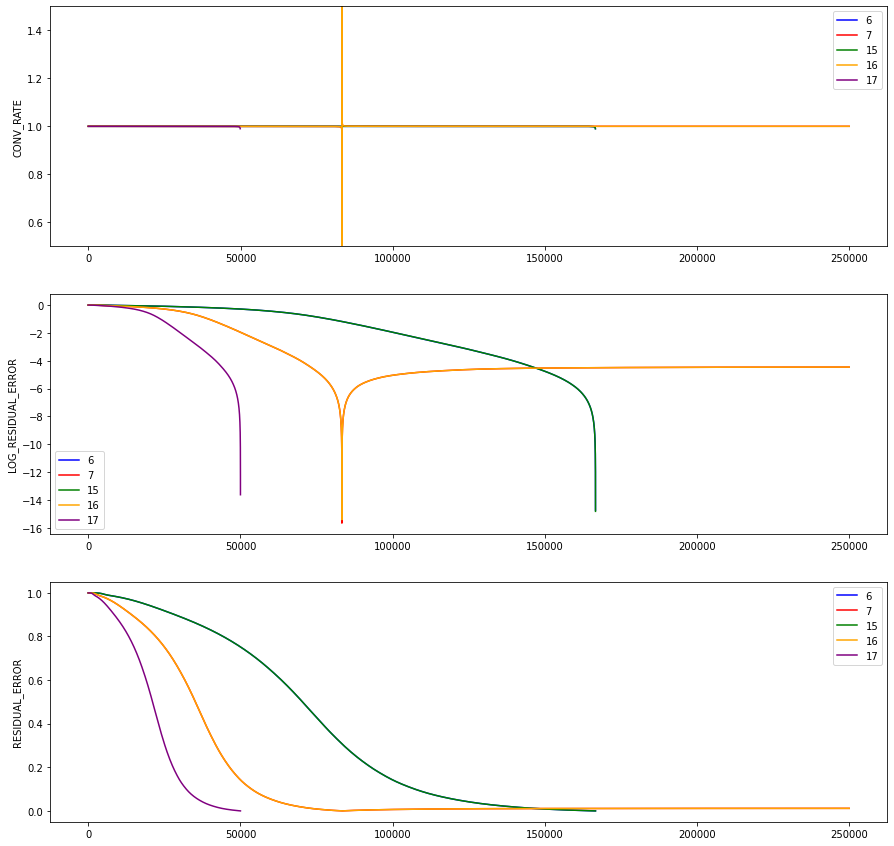

In [3]:
# fix f_best taking best performing model (17) fstar value, gotten with 50k iterations (file *gs_best_model_minimum_50k*)
fstar = -27823.290077639565 

# plot convergence rate and logarithmic residual errors of all 5 models
fig, axs = plt.subplots(3, figsize=(15,15))
colors = ['blue', 'red', 'green', 'orange', 'purple']
six_conv, six_logres, six_res = plot_single_model(six, fstar, axs, colors[0], '6')
seven_conv, seven_logres, seven_res = plot_single_model(seven, fstar, axs, colors[1], '7')
fifteen_conv, fifteen_logres, fifteen_res = plot_single_model(fifteen, fstar, axs, colors[2], '15')
sixteen_conv, sixteen_logres, sixteen_res = plot_single_model(sixteen, fstar, axs, colors[3], '16')
seventeen_conv, seventeen_logres, seventeen_res = plot_single_model(seventeen, fstar, axs, colors[4], '17')
plt.show()

## UNDERSTANDING THE UNEXPECTED BEHAVIOUR OF MODELS 7-16
The *residual error plot* goes near to zero as the iterations approach the point in which the *log residual error decrease*, but then starts to slowly increase.

This means that the optimization process got very close to the fstar value, but never satisfied the acceptable condition resulting in a continuation of the optimization process.

In [4]:
# Model 7
min_gap_fstar = math.inf
iteration = 0
for i, f in enumerate(seven.history["f"]):
    gap = abs(f-fstar)
    if gap < min_gap_fstar:
        min_gap_fstar = gap
        iteration = i
print(f"Model 07: min(|f-fstar|) = {min_gap_fstar:.7f} at iteration: {iteration}")
# Model 16
min_gap_fstar = math.inf
iteration = 0
for i, f in enumerate(sixteen.history["f"]):
    gap = abs(f-fstar)
    if gap < min_gap_fstar:
        min_gap_fstar = gap
        iteration = i
print(f"Model 16: min(|f-fstar|) = {min_gap_fstar:.7f} at iteration: {iteration}")

Model 07: min(|f-fstar|) = 0.0043995 at iteration: 83329
Model 16: min(|f-fstar|) = 0.0056539 at iteration: 83330


As we can see both models during the optimization process reach a minimun error wrt the target value that is *4e-3* and *5e-3* which won't meet the **acceptable condition** since the error is set to *1e-3*. In fact, both models ends in *stopped* status.

Until iteration 83k both models behaves similar to other cases, after that it starts to diverge resulting in an increasing residual error and log residual error. 